In [1]:
import pandas as pd
import numpy as np
import os
import csv
import json
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
entity2id = json.load(open("datasets/embed/entity_to_id.json"))
id2entity = {int(v): k for k, v in entity2id.items()}
entity_emb = np.load('datasets/embed/entity_embeddings.npy')

In [3]:
X_embedded = TSNE(n_components=2, n_jobs=-1).fit_transform(entity_emb).T

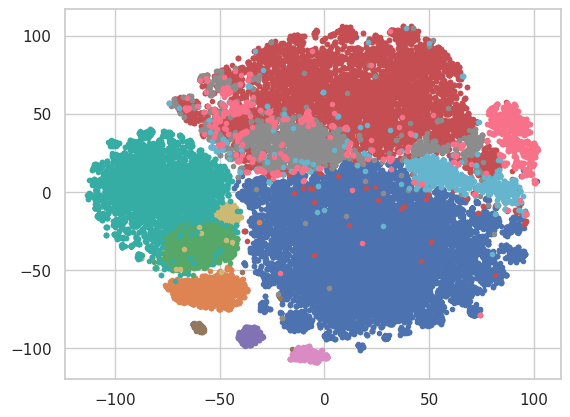

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Initialize dataset_id
dataset_id = {}
for entity_name, i in entity2id.items():
    entity_key = entity_name.split('::')[0]
    entity_key = entity_key.replace('_', ' ')
    if dataset_id.get(entity_key, None) is None:
        dataset_id[entity_key] = []
    dataset_id[entity_key].append(i)

# Define colors (extend the default Seaborn color palette by two more colors)
seaborn_colors = sns.color_palette("deep")  # Default Seaborn color palette
extra_colors = sns.color_palette("husl", 2)  # Add 2 extra colors from the "husl" palette
colors = seaborn_colors + extra_colors  # Combine both color lists

# Plot each group
for idx, (key, val) in enumerate(dataset_id.items()):
    val = np.asarray(val, dtype=int)

    # Plot points
    plt.plot(X_embedded[0][val], X_embedded[1][val], '.', label=key, color=colors[idx])

# Optionally adjust global font size
plt.rcParams.update({'font.size': 14})

# Display the plot
plt.show()


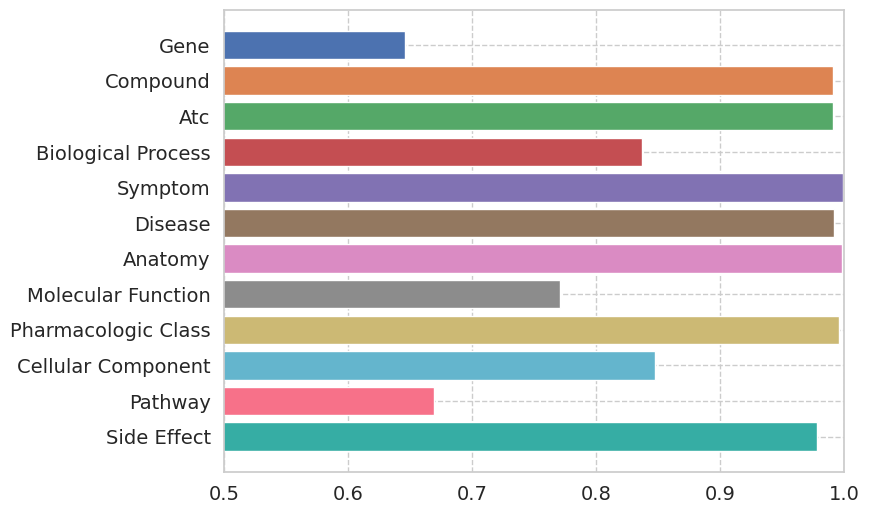

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Compute the cluster similarity (based on the assumption that each group in dataset_id is a cluster)
cluster_similarities = {}

# For each group in dataset_id, calculate the similarity to the group centroid
for group_key, indices in dataset_id.items():
    # Extract the embeddings of the entities in the group
    group_embeddings = X_embedded[:, indices]
    
    # Calculate the centroid of the group (mean of the embeddings)
    centroid = np.mean(group_embeddings, axis=1)
    
    # Calculate the cosine similarity between each entity in the group and the centroid
    similarities_to_centroid = cosine_similarity(group_embeddings.T, centroid.reshape(1, -1))
    
    # Store the similarities in the dictionary
    cluster_similarities[group_key] = similarities_to_centroid.flatten()

# Reverse the order of group names and mean similarities
reversed_group_names = list(cluster_similarities.keys())[::-1]
reversed_mean_similarities = [np.mean(similarities) for similarities in cluster_similarities.values()][::-1]

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create a color palette for the entity types (matching fig1)
entity_keys = list(dataset_id.keys())
palette = sns.color_palette("muted", len(entity_keys))  # Use the same color palette

# Create a dictionary mapping each entity_key to a color
entity_colors = {entity_keys[i]: colors[i] for i in range(len(entity_keys))}

# Optionally, you can visualize the similarities in a bar chart
plt.figure(figsize=(8, 6))

# Create a bar chart of the mean similarity to centroids for each group (with reversed order)
bars = plt.barh(reversed_group_names, reversed_mean_similarities, color=[entity_colors[key] for key in reversed_group_names])

# Thinner grid lines

plt.grid(axis='y', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', linewidth=1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0.5, 1.0)
# Display the plot
plt.show()
